In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

<Axes: >

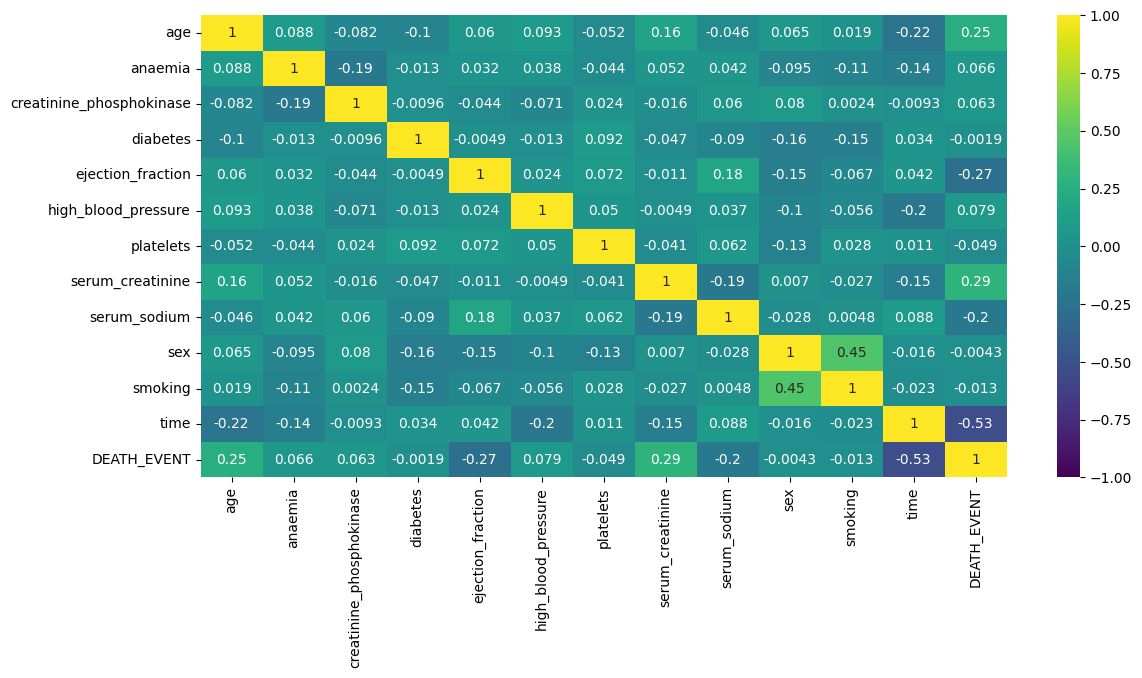

In [71]:
df = pd.read_csv("./docs/heart_failure_clinical_records.csv")
df.duplicated().sum()
df.isnull().sum()
corr = df.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(corr , vmin = -1 , vmax = 1 , annot = True , cmap = "viridis")

C:\Users\JustineCOMPAGNON\AppData\Local\Temp\ipykernel_24988\3614446740.py:8: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 299
  plt.legend(handles=plot.legend_elements()[0], labels=list(df['DEATH_EVENT']))


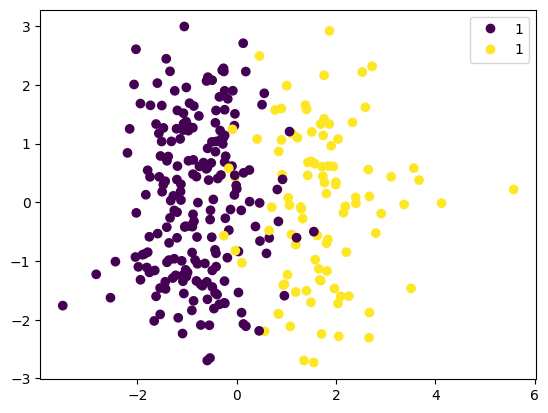

In [72]:
from sklearn.decomposition import PCA

std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)
pca = PCA(n_components=5)
Xt = pca.fit_transform(scaled_df)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=df['DEATH_EVENT'])
plt.legend(handles=plot.legend_elements()[0], labels=list(df['DEATH_EVENT']))
plt.show()

Shape of the X_train (209, 12)
Shape of the X_test (90, 12)
Shape of the y_train (209,)
Shape of the y_test (90,)


C:\Users\JustineCOMPAGNON\AppData\Local\Temp\ipykernel_24988\3414628157.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


Accuracy Score:- 0.6111111111111112
Precision Score:- 0.3870967741935484
Recall Score:- 0.42857142857142855
Confusion Matrix:- 
[[43 19]
 [16 12]]


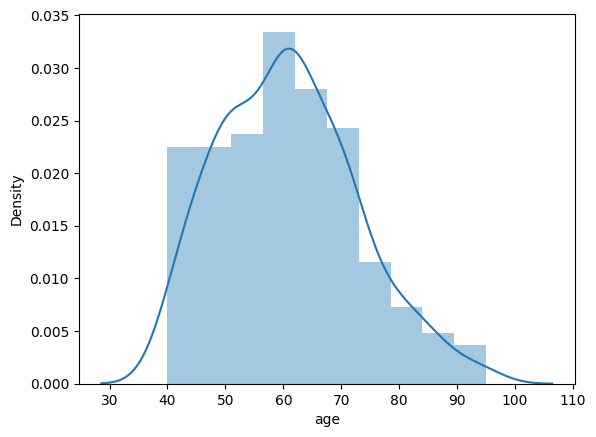

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)

print(f'Shape of the X_train {X_train.shape}')
print(f'Shape of the X_test {X_test.shape}')
print(f'Shape of the y_train {y_train.shape}')
print(f'Shape of the y_test {y_test.shape}')

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

def model_eval(y_test, y_pred):
    print(f'Accuracy Score:- {accuracy_score(y_test, y_pred)}')
    print(f'Precision Score:- {precision_score(y_test,y_pred)}')
    print(f'Recall Score:- {recall_score(y_test,y_pred)}')
    print(f'Confusion Matrix:- \n{confusion_matrix(y_test, y_pred)}')
    
    
sns.distplot(df['age'])

lr_model_pip = make_pipeline(StandardScaler(), RandomForestClassifier())
lr_model_pip.fit(X_train_pca, y_train)

y_pred1 = lr_model_pip.predict(X_test_pca)
model_eval(y_test, y_pred1)

In [74]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

df_res = pd.DataFrame({'classfier': [], 'accuracy': [], 'precision':[], 'recall':[], 'confusion_matrix':[]})
res = []
for i, classifier in enumerate(classifiers):
    lr_model_pip = make_pipeline(StandardScaler(), classifier)
    lr_model_pip.fit(X_train, y_train)

    y_pred1 = lr_model_pip.predict(X_test)
    res.append({'classfier': names[i], 'accuracy': accuracy_score(y_test, y_pred1), 'precision':precision_score(y_test,y_pred1), 'recall':recall_score(y_test,y_pred1), 'confusion_matrix':confusion_matrix(y_test, y_pred1)})
    
df = pd.DataFrame(res)               
display(df)

c:\Users\JustineCOMPAGNON\Documents\Project\Anaemia-Prediction\mlenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,classfier,accuracy,precision,recall,confusion_matrix
0,Nearest Neighbors,0.600000,0.375000,0.428571,"[[42, 20], [16, 12]]"
1,Linear SVM,0.655556,0.384615,0.178571,"[[54, 8], [23, 5]]"
2,RBF SVM,0.611111,0.379310,0.392857,"[[44, 18], [17, 11]]"
3,Gaussian Process,0.600000,0.375000,0.428571,"[[42, 20], [16, 12]]"
4,Decision Tree,0.566667,0.310345,0.321429,"[[42, 20], [19, 9]]"
5,Random Forest,0.622222,0.406250,0.464286,"[[43, 19], [15, 13]]"
6,Neural Net,0.600000,0.346154,0.321429,"[[45, 17], [19, 9]]"
7,AdaBoost,0.611111,0.379310,0.392857,"[[44, 18], [17, 11]]"
8,Naive Bayes,0.655556,0.434783,0.357143,"[[49, 13], [18, 10]]"
9,QDA,0.600000,0.357143,0.357143,"[[44, 18], [18, 10]]"


Accuracy Score:- 0.8555555555555555
Precision Score:- 0.8260869565217391
Recall Score:- 0.6785714285714286
Confusion Matrix:- 
[[58  4]
 [ 9 19]]


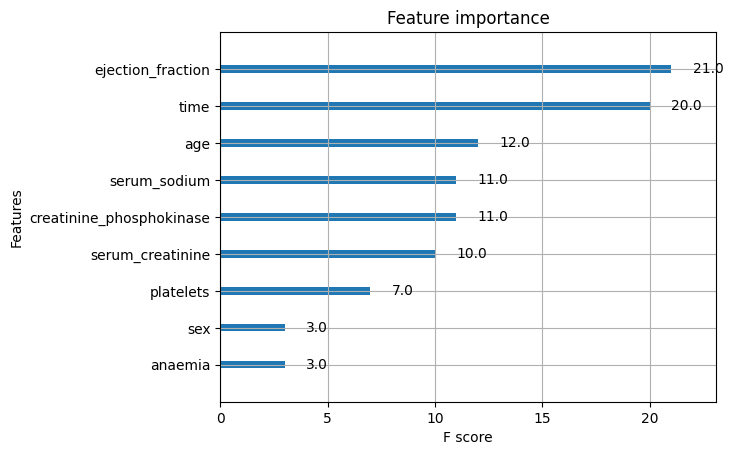

In [69]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(colsample_bytree = 1.0, 
                    learning_rate = 0.2,
                    max_depth = 4,
                    n_estimators = 10,
                    subsample = 1)

eval_set = [(X_test, y_test)]
xgb1.fit(X_train, y_train)
pred = xgb1.predict(X_test)
model_eval(y_test, pred)
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

In [ ]:
import joblib
joblib.dump(xgb1, 'model.pkl')
model = joblib.load('model.pkl')
model.predict(X_test)